# ToBig's_11th_Week03_Clustering
## Assignment 1
### K-Means
- 11기 김대웅

In [159]:
import numpy as np
import pandas as pd
import random
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

# 1. 데이터 확인 : iris 

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# 2. 함수 제작

In [177]:
def KMEANS(data, k):
    '''
    data : np.array 또는 pd.Series
    k : 군집의 개수
    '''
    # 두 점간의 거리를 계산하는 함수
    def dst(A, B):
        '''
        A : centroid
        B : 거리를 계산할 한 점
        둘 다 array로 받아야함.
        '''
        return np.array([np.sqrt(np.sum((i - B)**2)) for i in A])

    
    # centroid를 저장하는 arrray 생성
    # centroid = np.array([0]*k)
    # 초기 centroid random 설정
    centroid = np.array([i for i in data[random.sample(range(0, len(data)),k)]])
    count = 0

    # calculate distance 
    while count < 1:
        # 이전 centroid와 비교를 위한 변수
        pre_centroid = deepcopy(centroid)
        # 각 record의 군집 label
        label = np.array([np.argmin(dst(centroid, i)) for i in data])
        # cluster 별 centroid 계산
        centroid = np.array([np.array([ a for a, b in zip(data, label) if b== i ]).mean(axis=0) for i in range(k)])
        # 만약 이전 centroid와 같다면 count + 1 하고 3회 이상 같다면 반복을 종료
        if (centroid == pre_centroid).all():
            count +=1

    return label

In [182]:
KMEANS(iris.data, 3) == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,

# 3. 성능 확인
- ploting을 위한 code는 아래 링크의 code를 사용하였습니다.
- http://theyoonicon.com/scikit-learn%EC%9D%98-iris-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0/

In [180]:
features = iris.data    # shape = (150, 4)
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

## 3.1. Data Set lable

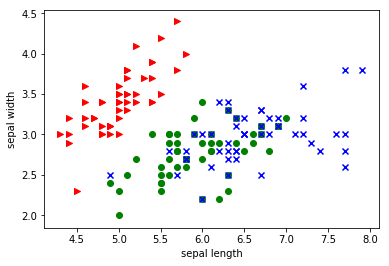

In [181]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(features[target == t, 0],   # sepal length
                features[target == t, 1],   # sepal width
                marker = marker,
                c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")

## 3.2. K-means 결과

In [211]:
label = KMEANS(iris.data, 3)

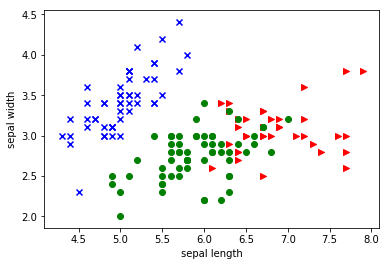

In [212]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(features[label == t, 0],   # sepal length
                features[label == t, 1],   # sepal width
                marker = marker,
                c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")